In [322]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from pandarallel import pandarallel
import regex as re
import glob
import os
pandarallel.initialize(progress_bar=True, nb_workers= 16, verbose = 0)
tqdm.pandas()

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import interpolate

In [324]:

all_files = glob.glob(os.path.join(path , "*.csv"))

In [325]:
file_paths=[]
path = r'D:\GIT\Bachelor-Arbeit\notebooks\classifiers\poc\SGD\sgd_score_cvs' # path
print(path)
#file_paths = [f for f in os.listdir(path) if f.endswith('.csv')]
for file in  glob.glob(os.path.join(path , "*.csv")):
    file_paths.append(file)
print("loading from :",len(file_paths),"files")
while '.csv' in file_paths:
    file_paths.remove('.csv')
#safe all file names as cleaned keys
r = r"(.csv)|(D:\\GIT\\Bachelor-Arbeit\\notebooks\\classifiers\\poc\\SGD\\sgd_score_cvs\\F1_matrix_)"
subst = ""
file_keys=[]
for i in file_paths:
    names = re.sub(r, subst, i)
    file_keys.append(names)
while '' in file_keys:
    file_keys.remove('')
file_keys = map(int, file_keys)

D:\GIT\Bachelor-Arbeit\notebooks\classifiers\poc\SGD\sgd_score_cvs
loading from : 500 files


In [326]:
df = pd.concat(map(pd.read_csv,file_paths),keys=file_keys)

In [327]:
classes = ['Medizin','Landwirtschaft','Umweltwissenschaften','ErnÃ¤hrung']
macros = ["accuracy","macro avg","weighted avg"]

In [357]:
df.columns = ['Klassen', 'precision','recall','f1-score','Klassen-Support']
df.index.set_names(["size", "index"], inplace=True)
df = df.sort_index(level=['size'], ascending=[True])
df_sub60000 = df.head(1756)

In [358]:
df_classes_sub60k = df_sub60000.loc[df_sub60000['Klassen'].isin(classes)]

In [359]:
df_acc_macro_weigh_sub60k = df_sub60000.loc[df_sub60000['Klassen'].isin(macros)]

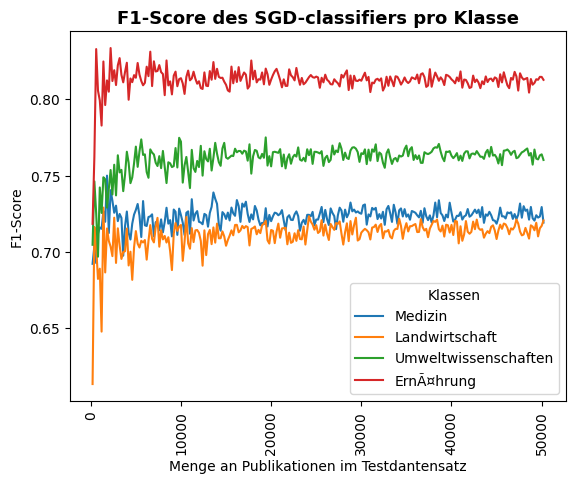

In [375]:
ax =  sns.lineplot(x='size', y='f1-score', hue='Klassen', 
                         data=df_classes_sub60k)
ax.set(xlabel="Menge an Publikationen im Testdantensatz",
       ylabel="F1-Score")
ax.text(x=0.5, y=1.01, s='F1-Score des SGD-classifiers pro Klasse',
        fontsize=13, weight='bold',
        ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.05, s="",
#        fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.tick_params(axis='x', rotation=90)
fig = ax.get_figure()
fig.savefig("grafiken\\F1-Score_SGD.png",dpi=300, bbox_inches = "tight") 

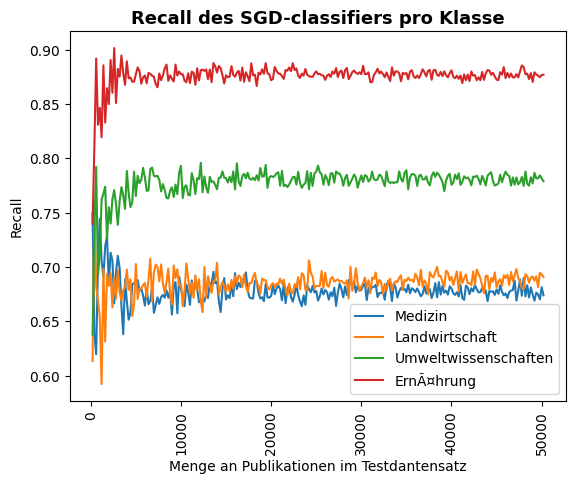

In [374]:
ax = sns.lineplot(x='size', y='recall', hue='Klassen', 
                         data=df_classes_sub60k)
ax.legend(loc=4)
ax.set(xlabel="Menge an Publikationen im Testdantensatz",
       ylabel="Recall")
ax.text(x=0.5, y=1.01, s='Recall des SGD-classifiers pro Klasse',
        fontsize=13, weight='bold',
        ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.05, s="",
#        fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.tick_params(axis='x', rotation=90)
fig = ax.get_figure()
fig.savefig("grafiken\\Recall-Score_SGD_w_support.png",dpi=300, bbox_inches = "tight") 

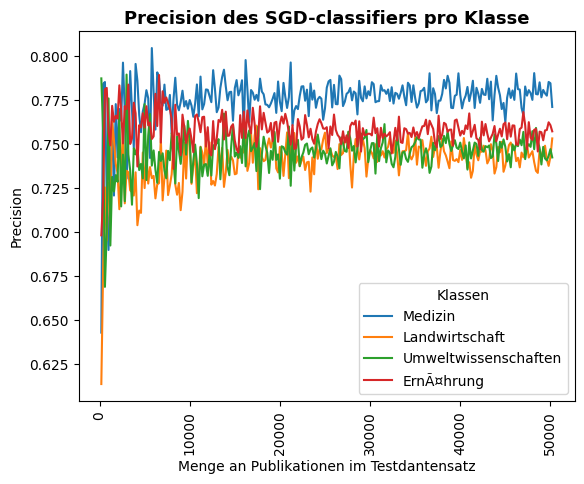

In [376]:
ax =   sns.lineplot(x='size', y='precision', hue='Klassen', 
                         data=df_classes_sub60k)
ax.set(xlabel="Menge an Publikationen im Testdantensatz",
       ylabel="Precision")
ax.text(x=0.5, y=1.01, s='Precision des SGD-classifiers pro Klasse',
        fontsize=13, weight='bold',
        ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.05, s="",
#        fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.tick_params(axis='x', rotation=90)
fig = ax.get_figure()
fig.savefig("grafiken\\Precision-Score_SGD.png",dpi=300, bbox_inches = "tight") 

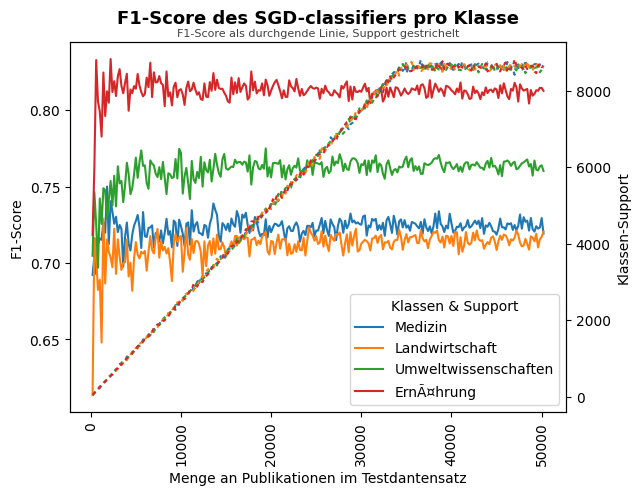

In [369]:
fig = plt.figure()
ax = fig.add_subplot(111)
palette = {
    'Medizin': 'tab:blue',
    'Landwirtschaft': 'tab:green',
    'Umweltwissenschaften': 'tab:orange',
    'ErnÃ¤hrung': 'tab:red',
}

#subplt, ax = plt.subplots()
ax = sns.lineplot(x='size', y='f1-score', hue='Klassen', 
                         data=df_classes_sub60k , ax=ax)
ax2 = ax.twinx()
ax2 =  sns.lineplot(x='size', y='Klassen-Support', hue='Klassen',style="Klassen",
                         data=df_classes_sub60k, ax=ax2, dashes=[(2, 2), (2, 2), (2, 2), (2, 2)],
                         palette=palette)
ax.set(xlabel="Menge an Publikationen im Testdantensatz",
       ylabel="F1-Score")
ax.text(x=0.5, y=1.04, s='F1-Score des SGD-classifiers pro Klasse',
        fontsize=13, weight='bold',
        ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.01, s="F1-Score als durchgende Linie, Support gestrichelt",
        fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.tick_params(axis='x', rotation=90)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2 , labels, loc=4, title="Klassen & Support")
ax2.legend([], [], frameon=False)
#fig = ax.get_figure()
#fig
fig.savefig("grafiken\\F1-Score_SGD_w_support.png",dpi=300, bbox_inches = "tight") 

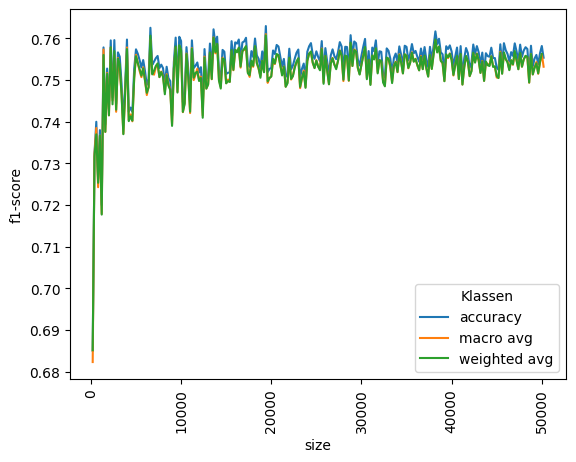

In [365]:
fg = sns.lineplot(x='size', y='f1-score', hue='Klassen', 
                         data=df_acc_macro_weigh_sub60k)
fg.tick_params(axis='x', rotation=90)


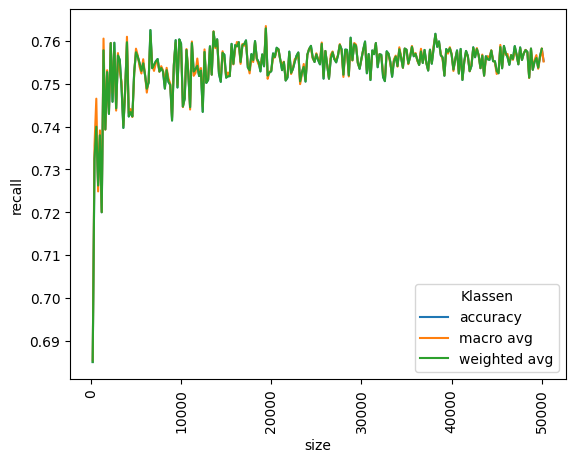

In [366]:
fg = sns.lineplot(x='size', y='recall', hue='Klassen', 
                         data=df_acc_macro_weigh_sub60k)
fg.tick_params(axis='x', rotation=90)

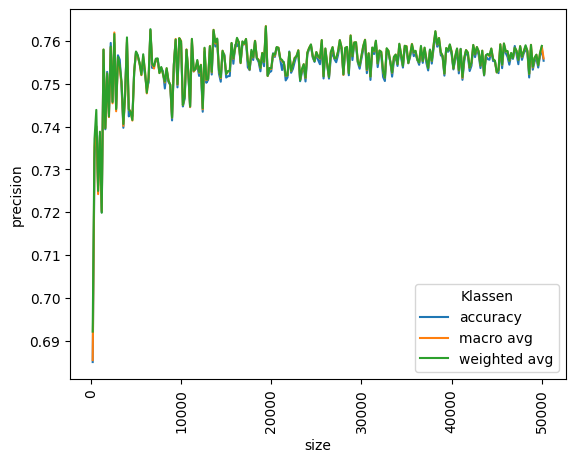

In [367]:
fg = sns.lineplot(x='size', y='precision', hue='Klassen', 
                         data=df_acc_macro_weigh_sub60k)
fg.tick_params(axis='x', rotation=90)